In [1]:
# 模块导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# 工作路径设置
import os
os.chdir('E:/AI工程师/微专业_AI工程师计算机视觉/二_Python快速掌握/项目01_电影数据处理及分析实战/')

# import warnings
# warnings.filterwarnings('ignore') 
# 不发出警告

In [2]:
# csv数据读取
data = pd.read_csv('iQiyi_Movie_Data.csv',encoding = 'gbk')
print(data.head())


       数据获取日期   演员  视频ID                                        详细链接  \
0  2016年5月24日  NaN   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  NaN  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  NaN  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  NaN  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  NaN  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名 更新时间    ...     \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  NaN    ...      
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  NaN    ...      
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  NaN    ...      
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  NaN    ...      
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  NaN    ...      

     上映年份                                                 简介   导演      差评数  \
0  2004.0  在单子

C:\Users\zhj\DL\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 数据清洗1-去除空值
def data_cleaning1(data):
    cols = data.columns.tolist()
    for col in cols:
        if data[col].dtype == 'object':
            data[col].fillna('缺失数据',inplace=True ) # inplace=True,表在原数据上进行更改
        else:
            data[col].fillna(0,inplace=True)
    return data

# 数据清洗2-时间标签转化
def data_cleaning2(data,*cols):
    for c in cols:
        data[c] = data[c].str.replace('年','.') # 字符串的替换 - replace
        data[c] = data[c].str.replace('月','.')
        data[c] = data[c].str.replace('日',' ')
        data[c] = pd.to_datetime(data[c])
    return data

data_cleaning1(data)
data_cleaning2(data,'数据获取日期')
print(data.head())

      数据获取日期    演员  视频ID                                        详细链接  \
0 2016-05-24  缺失数据   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1 2016-05-24  缺失数据  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2 2016-05-24  缺失数据  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3 2016-05-24  缺失数据  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4 2016-05-24  缺失数据  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名  更新时间    ...     \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  缺失数据    ...      
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  缺失数据    ...      
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  缺失数据    ...      
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  缺失数据    ...      
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  缺失数据    ...      

     上映年份                                                 简介    导演      差评数  \
0  2004

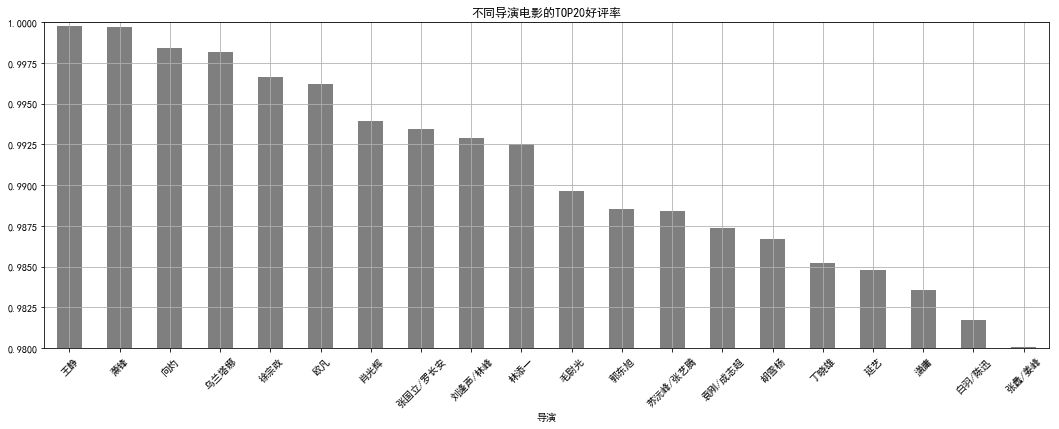

In [4]:
# 问题1 分析出不同导演电影的好评率，并筛选出TOP20
# ① 计算统计出不同导演的好评率，不要求创建函数
# ②	通过多系列柱状图，做图表可视化

# 按‘导演’进行分组：director_group
director_group = data.groupby('导演')['评分人数','好评数'].sum() 
director_group['好评率'] = director_group['好评数']/director_group['评分人数']

# 多列排序，按列顺序排序,ascending = False:降序
# inplace ,默认是False，若为True则排序之后的数据直接替换原来的数据框
director_group.sort_values(['好评率'],ascending = False,inplace = True) 
director_group

#  TOP20不同导演电影的好评率
director_df = director_group['好评率'].iloc[:20]

# 绘制柱状图
plt.rcParams['font.sans-serif']=['SimHei']  # 解决中文字符不能显示
plt.rcParams['axes.unicode_minus'] = False
director_df.plot(kind='bar',figsize = (18,6),title = '不同导演电影的TOP20好评率',
                 grid = True,
                 colormap='Greys_r',
                 alpha = 0.5,
                 rot = 45,
                 ylim = [0.980,1.000])

In [5]:
# 问题2 统计分析2001-2016年每年评影人数总量
# ① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
# ② 通过面积图，做图表可视化，分析每年人数总量变化规律
# ③ 验证是否有异常值（极度异常）
# ④ 创建函数分析出数据外限最大最小值）
# ⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？

# 数据删选整理得到2001-2016年每年评影人数总量数据
q2data1 = data[['导演','上映年份','整理后剧名']].drop_duplicates() # drop.duplicates移除重复

# 按‘整理后剧名’分组
q2data2 = data.groupby('整理后剧名')['评分人数','好评数'].sum() # 按‘整理后剧名’分组

# merge合并两份数据
merge_df = pd.merge(q2data1, q2data2, left_on='整理后剧名',right_index=True)
# 得到需要分析的2001-2016年每年评影人数总量数据:commenters_df
commenters_df = merge_df[merge_df['上映年份']>2000]

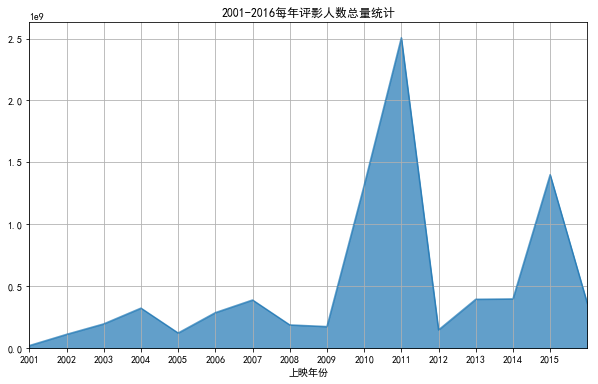

In [10]:
# 分析2001-2016年每年评影人数总量变化规律

# 不同年份的评分人数分组，commenters_group_s
commenters_group_s = commenters_df.groupby('上映年份')['评分人数'].sum()
# 绘制面积图
commenters_group_s.plot.area(figsize = (10,6),grid = True,
                       title = '2001-2016每年评影人数总量统计', 
                       alpha = 0.7, 
                       xlim = [2001,2016],
                       xticks = list(range(2001,2016)))
#commenters_group_s

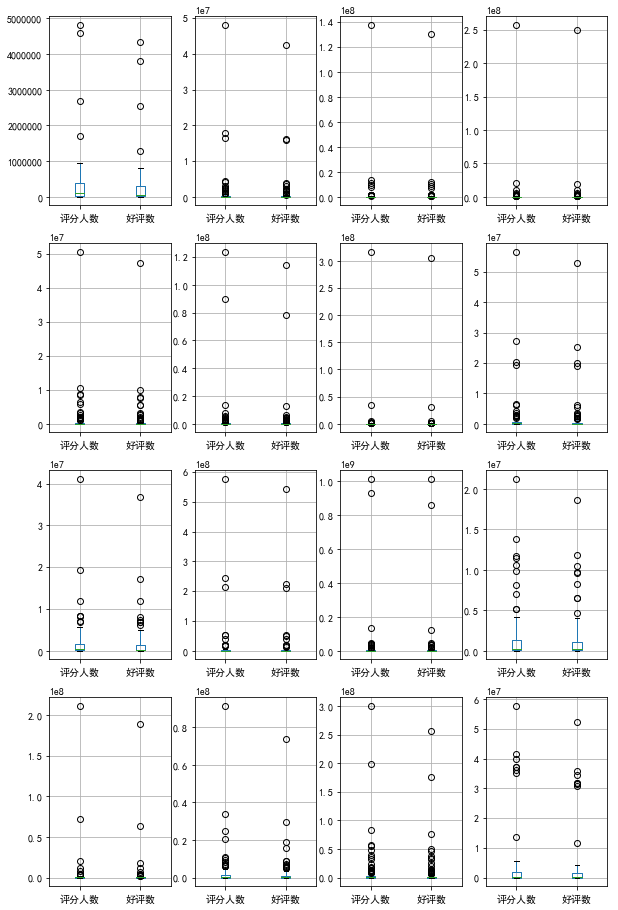

In [7]:
# ③ 验证是否有异常值（极度异常）
# 箱型图分析异常值（极度异常）

fig,axes = plt.subplots(4,4,figsize=(10,16))
st = 2001
for i in range(4):
    for j in range(4):
        data = commenters_df[commenters_df['上映年份']==st]
        data[['评分人数','好评数']].boxplot(whis = 3, ax = axes[i][j])
        st += 1

In [8]:
# ④ 创建函数分析出数据外限最大最小值）
# ⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
# 函数功能：查看2001-2016年的评分人数最大最小值，并确认异常值是否每年的热门电影？
def test(df):
    df['好评率'] = df['好评数']/df['评分人数']
    st = 2001
    for j in range(16):
        commenters_group_df = df[df['上映年份']==st]
        #commenters_group_df.sort_values(['评分人数'], ascending = False, inplace=True)
        a1 = commenters_group_df['评分人数'].max()
        b1 = commenters_group_df['评分人数'].min()
        a2 = commenters_group_df['好评数'].max()
        b2 = commenters_group_df['好评数'].min()
        m1 = commenters_group_df[commenters_group_df['评分人数']==a1]['整理后剧名'].iloc[0]
        m2 = commenters_group_df[commenters_group_df['评分人数']==b1]['整理后剧名'].iloc[0]
        m3 = commenters_group_df[commenters_group_df['好评数']==a2]['整理后剧名'].iloc[0]
        m4 = commenters_group_df[commenters_group_df['好评数']==b2]['整理后剧名'].iloc[0]
        print('%i年的《%s》获得最多评分人数为%i' % (st,m1,a1))
        print('%i年的《%s》获得最少评分人数为%i' % (st,m2,b1))
        print('%i年的《%s》获得最多的好评数为%i' % (st,m3,a2))
        print('%i年的《%s》获得最少的好评数为%i' % (st,m4,b2))

        # 最大好评率 
        c = commenters_group_df['好评率'].max()
        m = commenters_group_df[commenters_group_df['好评率']==c]['整理后剧名'].iloc[0]
        if m == m1 and m == m3:
            print('%i年的异常值是今年的热门电影' % st)
        else:
            print('%i年的异常值不是今年的热门电影' % st)
        print('------')
        st += 1
        
test(commenters_df)

2001年的《少年包青天2》获得最多评分人数为4809919
2001年的《喜鹊东南飞》获得最少评分人数为574
2001年的《少年包青天2》获得最多的好评数为4335522
2001年的《喜鹊东南飞》获得最少的好评数为390
2001年的异常值不是今年的热门电影
------
2002年的《少年张3丰》获得最多评分人数为48030057
2002年的《人生特别档案》获得最少评分人数为2195
2002年的《少年张3丰》获得最多的好评数为42450999
2002年的《人生特别档案》获得最少的好评数为1210
2002年的异常值不是今年的热门电影
------
2003年的《倚天屠龙记》获得最多评分人数为137252859
2003年的《热带雨林的爆笑生活》获得最少评分人数为1234
2003年的《倚天屠龙记》获得最多的好评数为130354883
2003年的《热带雨林的爆笑生活》获得最少的好评数为1080
2003年的异常值不是今年的热门电影
------
2004年的《天龙8部》获得最多评分人数为257017777
2004年的《健身房》获得最少评分人数为3284
2004年的《天龙8部》获得最多的好评数为249324460
2004年的《健身房》获得最少的好评数为1849
2004年的异常值是今年的热门电影
------
2005年的《刁蛮公主》获得最多评分人数为50604859
2005年的《bbc动物犯罪现场》获得最少评分人数为58
2005年的《刁蛮公主》获得最多的好评数为47325137
2005年的《bbc动物犯罪现场》获得最少的好评数为31
2005年的异常值不是今年的热门电影
------
2006年的《亮剑》获得最多评分人数为123629453
2006年的《我们像葵花》获得最少评分人数为5208
2006年的《亮剑》获得最多的好评数为114330960
2006年的《命运的春天》获得最少的好评数为2655
2006年的异常值不是今年的热门电影
------
2007年的《终极1家》获得最多评分人数为316121794
2007年的《左伟和杜叶的婚姻生活》获得最少评分人数为2838
2007年的《终极1家》获得最多的好评数为305682501
2007年的《谁在你身边》获得最少的好评数为1800
2007年的异常值不是今年的热门电影
-----

C:\Users\zhj\DL\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
